In [1]:
import fnmatch
import os
import os.path
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import random_split
import torchvision.transforms as T

from train_eval import *
import data_load
import model

In [2]:
%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print("Using device: {}".format(device))

Using device: cuda


In [3]:
# path of dataset
label_root = os.path.join(".", "Dataset", "raw_labels")
pic_root = os.path.join(".", "Dataset", "raw_screenshots")
sample_root = [os.path.join(pic_root, x)
    for x in os.listdir(pic_root)]

# load and wrap the data into dataloader
train_loader, cv_loader, test_loader = data_load.data_load(sample_root, label_root)


==========load the data==========
labels matrix: torch.Size([9271, 5])

0047.jpg done!

/home/yuzh652b/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:74: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:135.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


0823.jpg done!

samples matrix: torch.Size([9271, 3, 200, 150])


==========after processing==========
labels matrix:torch.Size([7858, 5])

samples matrix:torch.Size([7858, 3, 200, 150])


In [4]:
CNN_model = model.toho_CNN()
CNN_model = CNN_model.to(device)

Epoch:  0  ====================
loss:  0.14, cv_loss:  0.37
Epoch:  1  ====================
loss:  0.13, cv_loss:  0.38
Epoch:  2  ====================
loss:  0.12, cv_loss:  0.38
Epoch:  3  ====================
loss:  0.13, cv_loss:  0.40
Epoch:  4  ====================
loss:  0.14, cv_loss:  0.38
Epoch:  5  ====================
loss:  0.14, cv_loss:  0.41
Epoch:  6  ====================
loss:  0.14, cv_loss:  0.39
Epoch:  7  ====================
loss:  0.13, cv_loss:  0.39
Epoch:  8  ====================
loss:  0.13, cv_loss:  0.40
Epoch:  9  ====================
loss:  0.12, cv_loss:  0.39
Epoch: 10  ====================
loss:  0.13, cv_loss:  0.41
Epoch: 11  ====================
loss:  0.13, cv_loss:  0.42
Epoch: 12  ====================
loss:  0.11, cv_loss:  0.39
Epoch: 13  ====================
loss:  0.13, cv_loss:  0.40
Epoch: 14  ====================
loss:  0.12, cv_loss:  0.41
Epoch: 15  ====================
loss:  0.12, cv_loss:  0.41
Epoch: 16  ====================
loss:  0

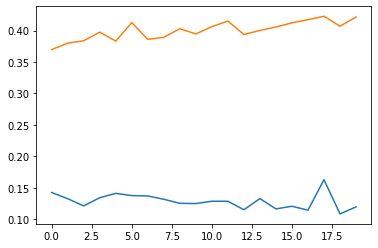

In [9]:
epochs = 150
losses, cv_losses = PokeAIMaster(CNN_model, epochs, train_loader, cv_loader)

In [10]:
test = plt.imread(os.path.join(sample_root[0], "0834.jpg"))
test = T.ToTensor()(test)
o = CNN_model(torch.stack([test]).to(device))
o.detach().cpu().numpy()

array([[7.4886210e-04, 4.6848443e-01, 6.2160122e-01, 1.4619509e-04,
        9.9999988e-01]], dtype=float32)

In [6]:
torch.save(CNN_model.state_dict(), "CNN_param.pth")